<a href="https://colab.research.google.com/github/ming80302/SOARS/blob/main/rd_csv_soar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

read csv file and plot time series dataFrame

In [2]:
import numpy as np
import pandas as pd
import datetime
from matplotlib import pyplot as plt

### 1 Read and plot PRISM dataset

read  /content/drive/MyDrive/data/SOARS/prec_prism_ca.txt
from  2021-10-01 00:00:00  to  2021-11-30 00:00:00


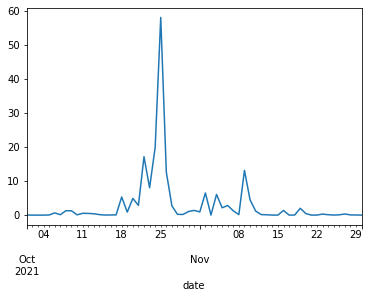

In [3]:
dir_i = '/content/drive/MyDrive/data/SOARS/'
flnm = dir_i + 'prec_prism_ca.txt'
print('read ', flnm)
 
df_prism = pd.read_csv(flnm, header = None, delim_whitespace=True)

# add column names and index
df_prism.columns = ['date','prec']
 
df_prism.index = df_prism.date
 
# convert date index to DateTime index for the plot of x-axis 
df_prism.index = pd.to_datetime(df_prism.index, format='%Y%m%d')

# convert pandas timestamp to datetime
date_s = df_prism.index[0].to_pydatetime()
date_e = df_prism.index[-1].to_pydatetime()
print('from ', date_s, ' to ', date_e)

df_prism.prec.plot();

### 2 Read and plot 50-ECMWF precipitation

read  /content/drive/MyDrive/data/SOARS/prec_ecmwf_ca.txt


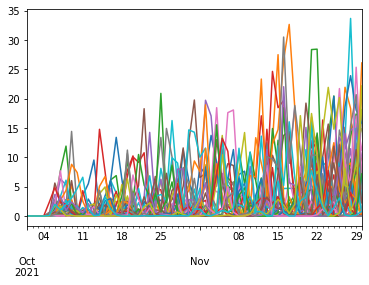

In [4]:
flnm = dir_i + 'prec_ecmwf_ca.txt'
print('read ', flnm)
 
df = pd.read_csv(flnm, header = None, delim_whitespace=True)

# create column names for dateFrame
list = ['year','month', 'day']
for nm in range(1,51):
  mem = 'mem' + '%02d'%nm
  list.append(mem)

df.columns = list

# create index
n_date = len(df)
 
date_s = datetime.datetime(df.year[0], df.month[0], df.day[0],   0)
date_e = datetime.datetime(df.year[n_date-1], df.month[n_date-1], df.day[n_date-1], 23)
 
date_ind=pd.date_range(date_s, date_e, freq='d')
df.index = date_ind 

data = df.iloc[:,3:]
data.plot(legend=False);

 ### 3 plot precipitation of specific member and overlay PRISM dataset

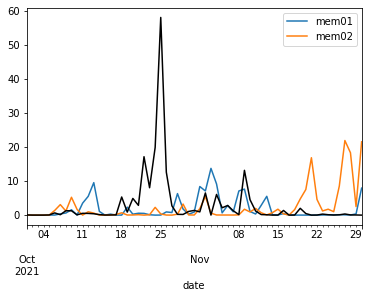

In [5]:
# (1) to plot specific member
# (2) overlay PRISM
data = df.iloc[:,3:5]
data.plot()
df_prism.prec.plot(color='black');

### 4 read era5 Weather type

read  /content/drive/MyDrive/data/SOARS/wt_era5_ca.txt
2021-10-01 00:00:00 - 2021-11-30 23:00:00
[ 1  2  3  4  5  6  7  8  9 10 11]


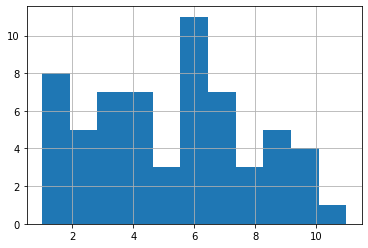

In [17]:
flnm = dir_i + 'wt_era5_ca.txt'
print('read ', flnm)
 
df_era5 = pd.read_csv(flnm, header = None, delim_whitespace=True)
#print(df_era5.head())

# add column names and index
df_era5.columns = ['year', 'month','day', 'WT']

# create index
n_date = len(df_era5)
 
date_s = datetime.datetime(df_era5.year[0], df_era5.month[0], df_era5.day[0],   0)
date_e = datetime.datetime(df_era5.year[n_date-1], df_era5.month[n_date-1], df_era5.day[n_date-1], 23)

print(date_s, '-', date_e)
date_ind=pd.date_range(date_s, date_e, freq='d')
df_era5.index = date_ind

n_unique=np.unique(df_era5.WT.values)
n_unique
print(n_unique)
df_era5.WT.hist(bins=len(n_unique));

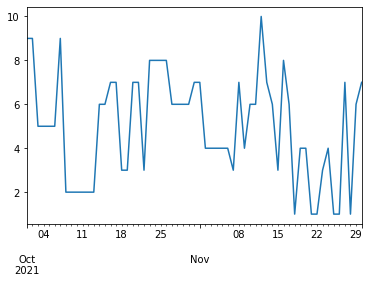

In [6]:
# convert date index to DateTime index for the plot of x-axis 
df_era5.index = pd.to_datetime(df_era5.index)
df_era5.WT.plot();

### 5 read and plot ECMWF weather type

read  /content/drive/MyDrive/data/SOARS/wt_ecmwf_ca.txt
[ 1  2  3  4  5  6  7  8  9 10 11 12] ------


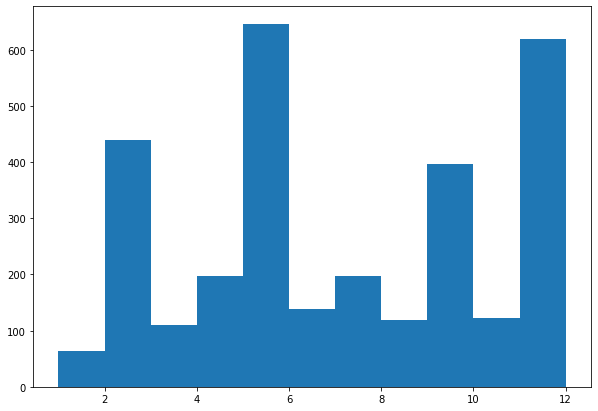

In [14]:
flnm = dir_i + 'wt_ecmwf_ca.txt'	
print('read ', flnm)
 
df_ec = pd.read_csv(flnm, header = None, delim_whitespace=True)

# create column names for dateFrame
list = ['year','month', 'day']
for nm in range(1,51):
  mem = 'mem' + '%02d'%nm
  list.append(mem)

df_ec.columns = list

# create index
n_date = len(df)
 
df_ec.index = date_ind 
#print(df_ec.head)

data = df_ec.iloc[:,3:].values.flatten() ##.stack()
n_unique = np.unique(data)
print(n_unique, '------')

fig = plt.figure(figsize =(10, 7))
 
plt.hist(data, bins = n_unique);

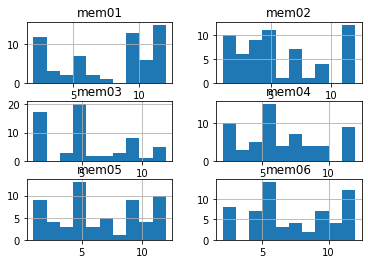

In [20]:
data_p = df_ec.iloc[:,3:9]
data_p.hist();

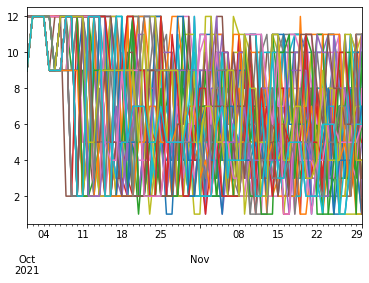

In [11]:
# Time Series plot
data = df_ec.iloc[:,3:]
data.plot(legend=False);